In [1]:
!git clone https://github.com/ultralytics/yolov3  # clone repo
%cd yolov3
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla K80)


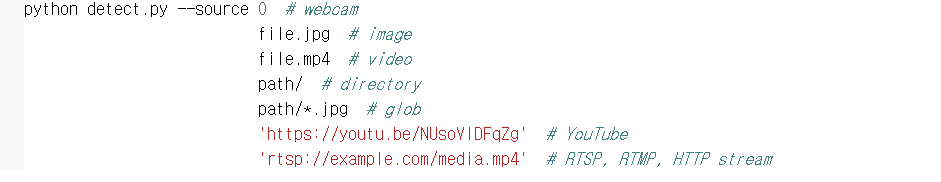

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

100% 118M/118M [00:06<00:00, 20.0MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.153s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 3 ties, Done. (0.094s)
Results saved to runs/detect/exp
Done. (0.473s)


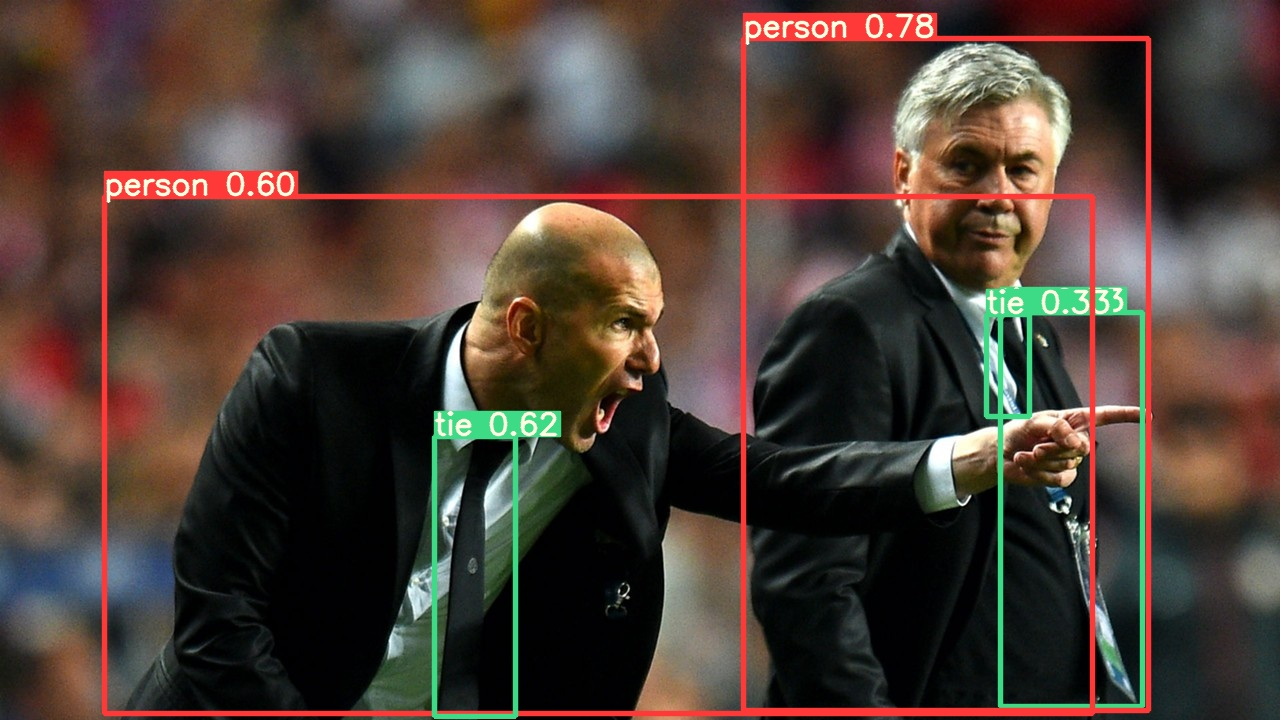

In [2]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images/  #v3가 모델이다. detect.py라는 디텍터가 제공된다. 파라미터랑, 옵션만 넣으면 된다. (argument에 있다.)
Image(filename='runs/detect/exp/zidane.jpg', width=600) #이미지 위치

In [ ]:
!python detect.py --weights yolov3s.pt --img 640 --conf 0.25 --source data/images/car_chasing1_Trim.mp4

In [9]:
# Download COCO128
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

  0%|          | 0.00/6.66M [00:00<?, ?B/s]

replace ../coco128/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [11]:
# Train YOLOv3 on COCO128 for 3 epochs
!python train.py --img 640 --batch 4 --epochs 3 --data coco128.yaml --weights yolov3.pt --nosave --cache #coco128.yaml이 없으면 설치까지 해주는 그런 편한 코드다.
# nosave = 저장 x 마지막만 저장 cache 는 시각화 일단 뭐 이런식으로 정보를 줄 수 있다.

github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=4, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='./data/coco128.yaml', device='', entity=None, epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp4', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=4, upload_dataset=False, weights='yolov3.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, w

In [12]:
#train2017 에는 클래스, x, y, w, h 가 들어있다 0에서 1사이인데 이게 normalize가 되서 그렇다.